<a href="https://colab.research.google.com/github/Suchitra-V31/Machine-learning-projects/blob/main/Cervical_Cancer_Risk_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cervical Cancer Risk Classification**



 Cervical cancer is a type of cancer that occurs in the cells of the cervix — the lower part of the uterus that connects to the vagina.



In this notebook we are going to predict whether the patient has cancer or not using various machine learning algorithms.

Let us first import all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Load the Data**

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/kag_risk_factors_cervical_cancer.csv')

In [3]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [4]:
data.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [5]:
data.shape

(858, 36)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [7]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let us check whether our dataset has any nan values.



In [8]:
data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


We could see that our dataset does'nt have any nan values.

We could find that our dataset has some '?' . So let us replace all the '?' with 0 and then replace that 0 with the median.

In [9]:
for feature in data.columns:
    data[feature].replace('?',np.nan,inplace=True )
    data[feature].fillna(value=0,inplace=True)

In [10]:
for feature in data.columns:
    data[feature].replace(0,data[feature].median(),inplace=True)

In [11]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0
2,34,1.0,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0


Now we can see that all our '?' are replaced with its median value.

**Exploratory Data analysis**

Let us visualize and try to understand the impact of features on dependent variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


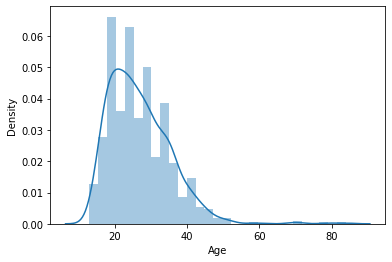

In [12]:
sns.distplot(data['Age'])

From this graph we could see that people with age group 20-40 has affected mostly with cervical cancer.

Let us create a dataframe df which contains all the four tests

In [13]:
df=pd.DataFrame(data[['Hinselmann','Schiller','Citology','Biopsy']])
df.head(10)

,Hinselmann,Schiller,Citology,Biopsy
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,1,1,0,1
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


Let us find the count of cancer affected person with respect to four kind of tests.

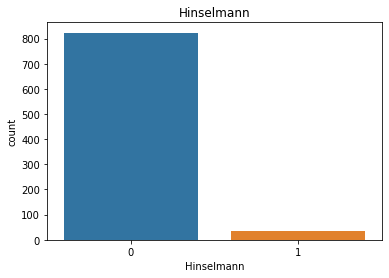

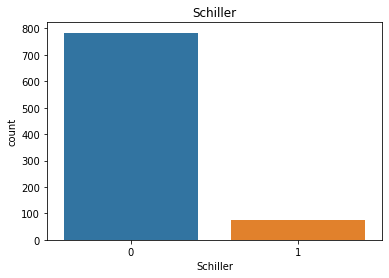

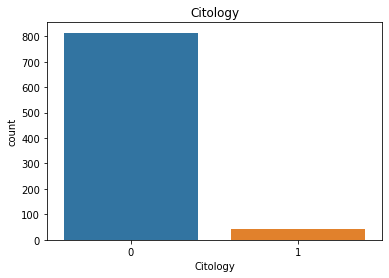

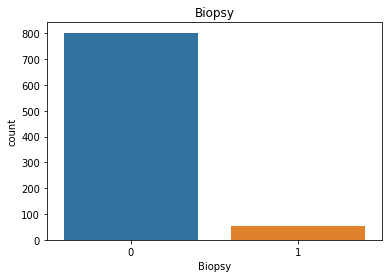

In [14]:
for features in df.columns:
    s=df.copy()
    sns.countplot(x=s[features])
    plt.xlabel(features)
    plt.title(features)
    plt.show()

Let us find the  age count of cancer affected person with respect to four kind of tests.

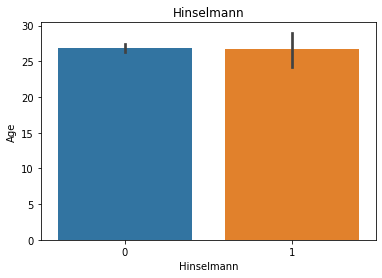

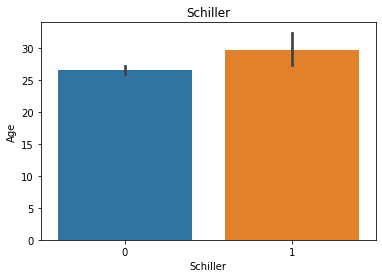

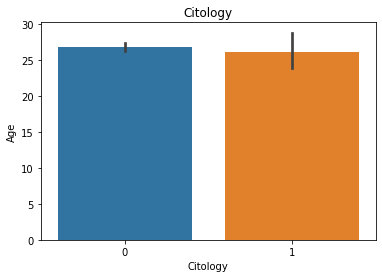

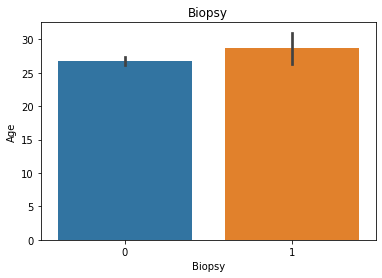

In [15]:
for features in df.columns:
    s=df.copy()
    sns.barplot(x=s[features],y=data['Age'])
    plt.xlabel(features)
    plt.ylabel("Age")
    plt.title(features)
    plt.show()
    

Now let us visualize the correlation of the df dataframe which contains the target values.

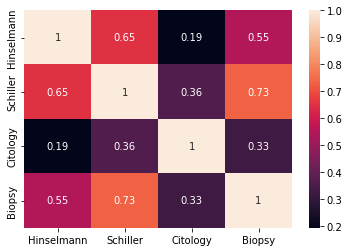

In [16]:
sns.heatmap(df.corr(),annot=True)

Let us find the correlation of the whole data.

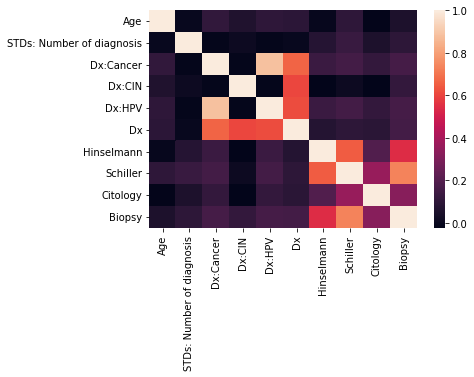

In [17]:
sns.heatmap(data.corr())

We could see that our target value has four columns. In order to make it to one we are going add the outcomes of all the four tests and store it in a seperate column called 'count'.

In [18]:
df['count']=df['Hinselmann']+df['Schiller']+df['Citology']+df['Biopsy']

In [19]:
df['count'].value_counts()

0    756
1     41
3     33
2     22
4      6
Name: count, dtype: int64

For making better predictions we are going replace 1,2,3,4 with 1 which means the patient has cancer and 0 means the patient does'nt have cancer.

In [20]:
df['result']=np.where(df['count']>0,1,df['count'])

In [21]:
df['result'].value_counts()

0    756
1    102
Name: result, dtype: int64

Let us split our data into independent and depentent feature.

In [22]:
X=data.drop(columns=['Hinselmann','Schiller','Citology','Biopsy'],axis=1)
y=df['result']

Stanadardize our features using StandardScaler.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()

In [25]:
scaled_feature=scaler.fit_transform(X)

In [26]:
X_scaled=scaled_feature
y=df['result']

Split the data into train/test.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [29]:
X_train.shape,y_train.shape

((600, 32), (600,))

In [30]:
X_test.shape,y_test.shape

((258, 32), (258,))

**Using Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

In [47]:
l_r=LogisticRegression()

In [48]:
model=l_r.fit(X_train,y_train)

In [49]:
pred=model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print('Confusion Matrix:\n ', confusion_matrix(y_test,pred))
print('Classification Report:\n ',classification_report(y_test,pred))

Confusion Matrix:
  [[229   3]
 [ 22   4]]
Classification Report:
                precision    recall  f1-score   support

           0       0.91      0.99      0.95       232
           1       0.57      0.15      0.24        26

    accuracy                           0.90       258
   macro avg       0.74      0.57      0.60       258
weighted avg       0.88      0.90      0.88       258



So we could see that our model has predicted with 90% accuracy.

**Logistic Regression Using Kfold Cross validation**

In this we are going to predict using same model but with kfold Cross validation and obtain the accurcay.

In [52]:
from sklearn.model_selection import KFold,cross_val_score

In [53]:
kfold=KFold(n_splits=10,shuffle=True,random_state=21)

In [54]:
model=LogisticRegression()

In [94]:
scores=cross_val_score(model,X,y,scoring='accuracy',cv=kfold,n_jobs=-1)


In [95]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.875 (0.030)


We could see that our model has predicted with 87% accuracy.

**KNN with CV**


In this we are going to use K Nearest Neighbor and find the best K value using Grid Search CV and also using Kfold cross validation.

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn=KNeighborsClassifier(n_jobs=-1)

In [59]:
knn_neighbors={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
classifier=GridSearchCV(knn,param_grid=knn_neighbors,cv=kfold,verbose=0).fit(X_train,y_train)

In [62]:
classifier.best_params_

{'n_neighbors': 8}

In [63]:
best_grid=classifier.best_estimator_

In [64]:
best_grid

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

In [65]:
predict=best_grid.predict(X_test)

In [66]:
print('Confusion Matrix:\n ',confusion_matrix(y_test,predict))
print('Classification Report:\n ',classification_report(y_test,predict))

Confusion Matrix:
  [[230   2]
 [ 23   3]]
Classification Report:
                precision    recall  f1-score   support

           0       0.91      0.99      0.95       232
           1       0.60      0.12      0.19        26

    accuracy                           0.90       258
   macro avg       0.75      0.55      0.57       258
weighted avg       0.88      0.90      0.87       258



We could see that our model has predicted wit 90% accuracy.

**Using Descision Tree with Kfold CV**

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
df_tree=DecisionTreeClassifier(random_state=0)

In [80]:
df_model=df_tree.fit(X_train,y_train)

In [81]:
df_pred=df_model.predict(X_test)

In [82]:
print('Confusion Matrix:\n ',confusion_matrix(y_test,df_pred))
print('Classification Report:\n ',classification_report(y_test,df_pred))

Confusion Matrix:
  [[202  30]
 [ 21   5]]
Classification Report:
                precision    recall  f1-score   support

           0       0.91      0.87      0.89       232
           1       0.14      0.19      0.16        26

    accuracy                           0.80       258
   macro avg       0.52      0.53      0.53       258
weighted avg       0.83      0.80      0.81       258



We could see that our model has predicted with 80% accuracy.

Using kfold Cross validation with descision tree model.

In [83]:
score=cross_val_score(df_model,X,y,scoring='accuracy',cv=kfold,n_jobs=-1)

In [84]:
print('Accuracy: %.3f (%.3f)' % (np.mean(score), np.std(score)))

Accuracy: 0.811 (0.041)


**Using Random Forest**

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf=RandomForestClassifier()

In [69]:
rf_model = rf.fit(X_train,y_train)

In [70]:
rf_pred=rf_model.predict(X_test)


In [71]:
print('Confusion Matrix:\n ',confusion_matrix(y_test,rf_pred))
print('Classification Report:\n ',classification_report(y_test,rf_pred))

Confusion Matrix:
  [[227   5]
 [ 22   4]]
Classification Report:
                precision    recall  f1-score   support

           0       0.91      0.98      0.94       232
           1       0.44      0.15      0.23        26

    accuracy                           0.90       258
   macro avg       0.68      0.57      0.59       258
weighted avg       0.86      0.90      0.87       258



We have got 90% accuracy.

Using Kfold CV in random forest model

In [96]:
s=cross_val_score(rf_model,X,y,scoring='accuracy',cv=kfold,n_jobs=-1)

In [97]:
print('Accuracy: %.3f (%.3f)' % (np.mean(s), np.std(s)))

Accuracy: 0.878 (0.023)


We could get 87% accuracy.

**Using XGBoost**

In [72]:
import xgboost as xgb

In [73]:
xg_boost=xgb.XGBClassifier(cv=kfold)
xg_model=xg_boost.fit(X_train,y_train)

In [74]:
xg_pred=xg_model.predict(X_test)

In [75]:
print('Confusion Matrix:\n ',confusion_matrix(y_test,xg_pred))
print('Classification Report:\n ',classification_report(y_test,xg_pred))

Confusion Matrix:
  [[231   1]
 [ 24   2]]
Classification Report:
                precision    recall  f1-score   support

           0       0.91      1.00      0.95       232
           1       0.67      0.08      0.14        26

    accuracy                           0.90       258
   macro avg       0.79      0.54      0.54       258
weighted avg       0.88      0.90      0.87       258



We could see that our model has aquired 90% accuracy

From all the regression techniques we have tried we got 90% accuracy but when we keenly observe we could see that our precision,recall ,f1 score all of its percentage has been increased.

Compaers with all the other models XGBoost model has performed well.